# MQF624
# Machine Learning and Financial Application
# Group Project

**References**
* [Time-series Data To Forecast Stock Prices Using Deep Neural Networks](https://www.linkedin.com/pulse/time-series-data-forecast-stock-prices-using-deep-neural-erez-katz/)
* [Is Your Deep Learning Strategy Robust Enough?](https://www.linkedin.com/pulse/your-deep-learning-strategy-robust-enough-erez-katz/?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3B2YV4lejDS8S5pbxIXva0kg%3D%3D&licu=urn%3Ali%3Acontrol%3Ad_flagship3_pulse_read-related)
* [A simple deep learning model for stock price prediction using TensorFlow](https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877)
* [Deep Learning in Finance](https://towardsdatascience.com/deep-learning-in-finance-9e088cb17c03)
* [Activation Functions: Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)
* [12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
* [Deep Learning with Emojis (not Math)](https://tech.instacart.com/deep-learning-with-emojis-not-math-660ba1ad6cdc)
* [Boost Your Jupyter Notebook Productivity](https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad)
* [epochs，batch_size，iterations](https://blog.csdn.net/u013041398/article/details/72841854)
* [7 Ways Time-Series Forecasting Differs from Machine Learning](https://www.datascience.com/blog/time-series-forecasting-machine-learning-differences)
* [How to Create an ARIMA Model for Time Series Forecasting with Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

**Tensorflow crash cource**
* [Introduction to Neural Networks](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/anatomy)
* [Google Cloud Datalab](https://cloud.google.com/datalab/docs/quickstart)

**Setup tensorflow environment**
* [Anaconda, Jupyter Notebook, TensorFlow and Keras for Deep Learning](https://medium.com/@margaretmz/anaconda-jupyter-notebook-tensorflow-and-keras-b91f381405f8)
* [How to Setup a Python Environment for Machine Learning and Deep Learning with Anaconda](https://machinelearningmastery.com/setup-python-environment-machine-learning-deep-learning-anaconda/)

# Report Structure
* Intrduction
    * Traditional ARIMA forecast
    * Machine Learning
    * Deep Learning
    * Data
* Methodology
    * Linear Rgression
    * Decision Tree
    * Random Forest
    * SVM (SVR)
    * DNN
* Results
* Conclusion

In [1]:
#!conda install pip
#!pip3 install --upgrade tensorflow # for python 3.*
#!conda install -c conda-forge keras=2.1.6
#!conda install -c conda-forge keras-gpu=2.1.6
%matplotlib inline

In [2]:
from __future__ import print_function
from math import sqrt, ceil
from IPython import display
from sklearn import linear_model, metrics, model_selection, datasets, decomposition
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

tf.logging.set_verbosity(tf.logging.ERROR)
#pd.options.display.max_rows = 10
#pd.options.display.float_format = '{:.1f}'.format

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Get Raw Data

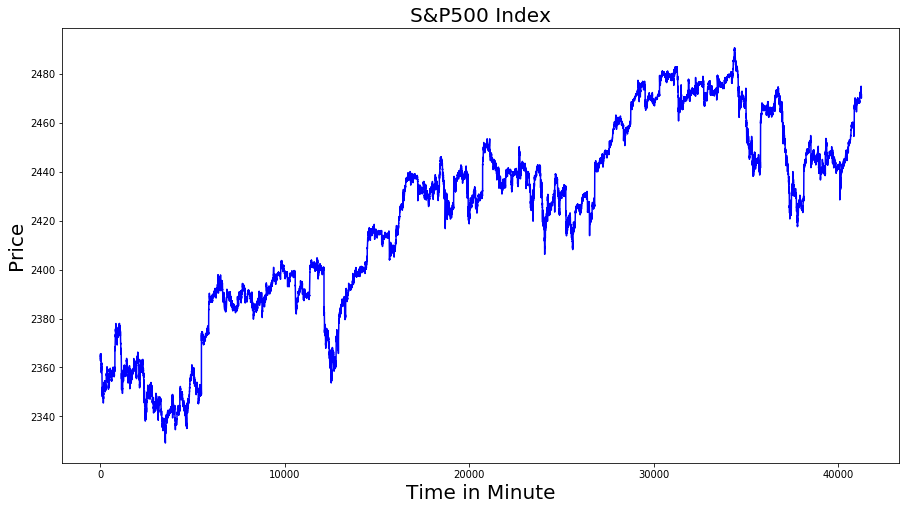

In [3]:
df_data = pd.read_csv('data_stocks.csv')
df_data = df_data.drop(['DATE'], 1)
plt.figure(figsize = (15,8))
plt.plot(df_data.loc[:, 'SP500'], color = 'blue')
plt.ylabel("Price", fontsize=20)
plt.xlabel("Time in Minute", fontsize=20)
plt.title("S&P500 Index", fontsize=20)
plt.savefig('raw_data.png')
plt.show()
# April - August 2017

In [4]:
df_data.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


# Data Cleaning

In [5]:
df_data_copy = df_data.copy()

In [6]:
xx = df_data_copy[df_data_copy.columns[1:]].as_matrix()
xx.shape

(41266, 500)

In [7]:
n_components = 10
pca = decomposition.PCA(n_components = n_components)
feature_columns = ['pc'+str(i+1) for i in range(n_components)]
xx_transformed = pca.fit_transform(xx)
df_principle = pd.DataFrame(data = xx_transformed, columns = feature_columns)
df_principle.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,306.701459,83.224016,60.078577,30.270852,9.200123,1.774582,31.403627,-13.439591,8.590776,-9.535995
1,303.073532,79.136155,60.773024,29.619399,8.997321,3.583167,31.139307,-14.076466,9.037794,-11.839954
2,301.079787,78.298115,58.191857,31.429485,9.652514,4.705098,28.646501,-13.114769,10.209885,-13.139046
3,301.420784,81.352617,58.092764,33.183586,10.735934,5.757229,27.473703,-14.007140,9.190927,-13.184877
4,298.828810,81.804920,55.906312,35.514036,11.329844,7.106367,25.153599,-13.627711,11.465329,-13.860372


In [8]:
xx_inverse = pca.inverse_transform(xx_transformed)
tot_var = sum(sum((xx - pca.mean_)**2))
res_var= sum(sum((xx - xx_inverse)**2))
exp_var= tot_var - res_var
explained_variance_ratio = exp_var/tot_var
explained_variance_ratio

0.9807634404763618

In [9]:
df_data_feature = pd.concat([df_principle, df_data_copy[['SP500']]], axis = 1)
with open('df_data_feature.tex','w') as tf:
    tf.write(df_data_feature.describe().to_latex())
df_data_feature.describe()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,SP500
count,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,41266.000000
mean,-9.029089e-14,8.924607e-14,-2.034877e-14,1.302892e-13,-7.958135e-15,-3.875330e-14,-9.294041e-14,-1.627054e-14,-2.756302e-14,-1.463981e-14,2421.537882
std,1.719072e+02,8.283568e+01,6.110003e+01,3.951305e+01,2.319127e+01,1.909979e+01,1.821149e+01,1.432585e+01,1.216521e+01,1.115434e+01,39.557135
min,-2.419860e+02,-1.363145e+02,-1.010530e+02,-6.632881e+01,-4.755717e+01,-3.950709e+01,-4.376552e+01,-3.078384e+01,-2.504465e+01,-2.556132e+01,2329.139900
25%,-1.579531e+02,-6.198393e+01,-5.508002e+01,-3.011427e+01,-1.572019e+01,-1.550775e+01,-1.213442e+01,-1.229658e+01,-1.036913e+01,-7.281700e+00,2390.860100
50%,-3.718864e+01,-2.835816e+01,-9.251282e+00,-1.591460e+01,1.176434e+00,7.239131e-02,1.775442e+00,1.938668e-02,-6.205401e-01,-2.200546e+00,2430.149900
75%,1.408932e+02,8.174492e+01,4.540173e+01,3.449064e+01,1.956158e+01,1.606359e+01,1.001373e+01,9.841286e+00,8.408951e+00,6.980073e+00,2448.820100
max,3.192396e+02,1.849808e+02,1.445694e+02,1.059772e+02,4.760040e+01,4.101100e+01,5.170185e+01,3.573989e+01,3.443694e+01,3.319963e+01,2490.649900


#### Shuffle the data

In [10]:
df_data_feature = df_data_feature.reindex(np.random.permutation(df_data_feature.index))
with open('df_data_feature_shuffle.tex','w') as tf:
    tf.write(df_data_feature.head().to_latex())
df_data_feature.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,SP500
16631,-18.222950,-130.116681,-38.333060,-30.703400,25.046666,-25.810225,0.650786,8.891857,-9.214457,-6.743383,2436.9500
13745,59.019266,-70.769317,-69.298937,1.348996,37.162496,21.285103,-24.206766,-9.986194,-14.651085,10.113819,2397.1101
22884,-82.596853,-62.870288,-32.010124,33.514096,-20.070367,-5.906004,46.119424,11.272617,-14.756203,-14.296522,2443.2900
11849,124.255640,-80.889193,-32.129340,-31.176647,-4.370434,30.759068,3.596764,-16.229960,14.038338,12.038756,2399.9700
30196,-229.175229,-46.385834,73.471799,14.766718,20.498304,37.531568,17.886999,18.827104,20.218773,-4.053453,2469.7000


#### Split training, validation and testing data

In [11]:
data_train, data_test = model_selection.train_test_split(df_data_feature, 
                                                         test_size = 0.2, 
                                                         random_state=1,
                                                         shuffle=True)

data_validation, data_test= model_selection.train_test_split(data_test, 
                                                         test_size = 0.5, 
                                                         random_state=1,
                                                         shuffle=True)
display.display(data_train.describe())
display.display(data_validation.describe())
display.display(data_test.describe())

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,SP500
count,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000
mean,-0.586888,0.010300,-0.101286,0.068283,-0.057527,-0.050213,0.034603,0.005443,-0.002957,-0.022276,2421.681547
std,171.664939,82.886461,61.096484,39.585300,23.164900,19.110796,18.232384,14.307944,12.180977,11.116823,39.474440
min,-241.986036,-136.314501,-101.052995,-66.328812,-47.557167,-39.507093,-43.765521,-30.783843,-24.736435,-25.561324,2329.139900
25%,-157.966404,-61.879937,-55.076469,-30.117427,-15.735849,-15.505102,-12.087293,-12.274196,-10.352738,-7.266938,2390.997500
50%,-37.643935,-28.129903,-9.781814,-15.919525,1.093780,0.018322,1.791925,0.036280,-0.625458,-2.206950,2430.230000
75%,140.668298,81.861193,45.222604,34.632000,19.495210,16.008358,10.060970,9.828303,8.425897,6.947199,2448.872550
max,319.239564,184.980783,144.569415,105.977163,47.600399,40.528261,51.701846,35.698447,34.357438,33.081590,2490.649900


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,SP500
count,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000
mean,2.385069,0.282300,-1.374480,0.356226,0.495717,0.027530,-0.059199,-0.030328,-0.219436,0.219965,2420.841026
std,171.722138,83.227624,60.948225,39.169924,23.339641,18.907964,18.340440,14.357943,12.063209,11.271107,39.623798
min,-240.427645,-136.184526,-100.385682,-65.587203,-46.779881,-39.041166,-42.751826,-30.099318,-24.143646,-24.645795,2331.760000
25%,-155.284500,-62.160820,-55.591227,-29.224685,-15.556209,-15.647024,-12.135955,-11.980662,-10.562334,-7.174868,2390.710000
50%,-33.395109,-29.648190,-13.752124,-14.816580,1.650982,0.159195,1.662550,0.021656,-0.819268,-2.062670,2429.820100
75%,140.887318,81.506646,44.125766,34.042426,20.062728,16.003069,9.900779,9.737041,8.064777,7.490416,2448.100100
max,319.017528,179.329223,143.556327,102.389945,46.562557,39.884123,51.023595,35.739885,34.436937,33.199628,2490.010000


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,SP500
count,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000
mean,2.309464,-0.364688,2.184671,-0.902424,-0.035555,0.374125,-0.217594,-0.013207,0.243090,-0.041775,2421.085550
std,174.017895,82.051470,61.239416,39.272553,23.252932,19.202696,17.915142,14.439845,12.139109,11.335396,40.145739
min,-240.998506,-135.995815,-100.408451,-65.054452,-46.734060,-39.272692,-43.589813,-30.257352,-25.044650,-25.391299,2329.139900
25%,-159.599101,-62.735872,-54.654439,-30.719702,-15.744486,-15.426891,-12.396142,-12.618515,-10.241889,-7.410658,2390.389900
50%,-32.312774,-28.868680,-3.254561,-16.395464,1.261119,0.424624,1.745499,-0.093685,-0.282091,-2.307067,2429.840100
75%,143.435270,80.825851,47.808678,34.081540,19.230797,16.625354,9.628342,10.170692,8.669109,6.885630,2450.699950
max,318.769460,178.384811,143.758271,104.167456,47.136699,41.010998,50.802386,34.056448,31.159615,32.440153,2490.310100


#### Scaling feature values

Scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range (for example, 0 to 1 or -1 to +1). If a feature set consists of only a single feature, then scaling provides little to no practical benefit. If, however, a feature set consists of multiple features, then feature scaling provides the following benefits:
* Helps gradient descent converge more quickly.
* Helps avoid the "NaN trap," in which one number in the model becomes a NaN (e.g., when a value exceeds the floating-point precision limit during training), and—due to math operations—every other number in the model also eventually becomes a NaN.
* Helps the model learn appropriate weights for each feature. Without feature scaling, the model will pay too much attention to the features having a wider range.  

You don't have to give every floating-point feature exactly the same scale. Nothing terrible will happen if Feature A is scaled from -1 to +1 while Feature B is scaled from -3 to +3. However, your model will react poorly if Feature B is scaled from 5000 to 100000.

It can be a good standard practice to normalize the inputs to fall within the range -1, 1. This helps SGD not get stuck taking steps that are too large in one dimension, or too small in another. Fans of numerical optimization may note that there's a connection to the idea of using a preconditioner here.

Remark: Caution must be undertaken regarding what part of the data is scaled and when. A common mistake is to scale the whole dataset before training and test split are being applied. Why is this a mistake? Because scaling invokes the calculation of statistics e.g. the min/max of a variable. When performing time series forecasting in real life, you do not have information from future observations at the time of forecasting. Therefore, calculation of scaling statistics has to be conducted on training data and must then be applied to the test data. Otherwise, you use future information at the time of forecasting which commonly biases forecasting metrics in a positive direction.

In [12]:
scaler = MinMaxScaler()
data_train_copy = data_train[feature_columns].copy()
data_validation_copy = data_validation[feature_columns].copy()
data_test_copy = data_test[feature_columns].copy()

scaler.fit(data_train_copy)
data_train_norm = scaler.transform(data_train_copy)
data_validation_norm = scaler.transform(data_validation_copy)
data_test_norm = scaler.transform(data_test_copy)

In [13]:
data_train_normalize = pd.DataFrame(index = data_train_copy.index, 
                                    columns = data_train_copy.columns, 
                                    data = data_train_norm)
data_validation_normalize = pd.DataFrame(index = data_validation_copy.index, 
                                    columns = data_validation_copy.columns, 
                                    data = data_validation_norm)
data_test_normalize = pd.DataFrame(index = data_test_copy.index, 
                                    columns = data_test_copy.columns, 
                                    data = data_test_norm)

#### Traning, validation and test data set
Normalize the target data by dividing 100

In [14]:
training_examples = data_train_normalize.copy()
training_targets = data_train['SP500']/100

validation_examples = data_validation_normalize.copy()
validation_targets = data_validation['SP500']/100

test_examples = data_test_normalize.copy()
test_targets = data_test['SP500']/100

In [15]:
display.display(training_examples.describe())
display.display(training_targets.describe())

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
count,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000,33012.000000
mean,0.430129,0.424298,0.411004,0.385344,0.499168,0.492993,0.458797,0.463120,0.418546,0.435501
std,0.305875,0.257976,0.248741,0.229738,0.243437,0.238779,0.190980,0.215214,0.206129,0.189568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149707,0.231670,0.187184,0.210157,0.334407,0.299892,0.331823,0.278415,0.243404,0.311962
50%,0.364100,0.336714,0.371591,0.292557,0.511267,0.493849,0.477204,0.463584,0.408011,0.398247
75%,0.681819,0.679050,0.595530,0.585939,0.704646,0.693637,0.563821,0.610872,0.561181,0.554347
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


count    33012.000000
mean        24.216815
std          0.394744
min         23.291399
25%         23.909975
50%         24.302300
75%         24.488726
max         24.906499
Name: SP500, dtype: float64

# ARIMA

In [18]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

series = df_data_copy['SP500']
X = series.values

size = int(len(X) * 0.998)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

Test RMSE: 0.403


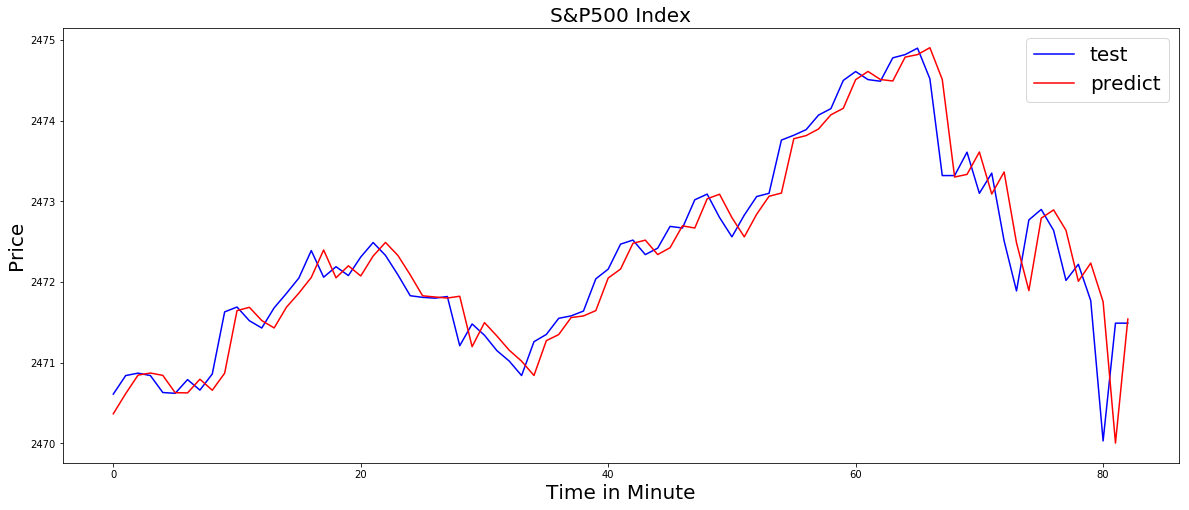

In [19]:
error = np.sqrt(metrics.mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

# plot
plt.figure(figsize = (20,8))
plt.plot(test, color = 'blue', label = 'test')
plt.plot(predictions, color='red', label = 'predict')
plt.legend(fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.xlabel("Time in Minute", fontsize=20)
plt.title("S&P500 Index", fontsize=20)
plt.savefig('arima.png')
plt.show()

# Linear Regression

In [43]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(training_examples, training_targets)

training_pred = regr_linear.predict(training_examples)
validation_pred = regr_linear.predict(validation_examples)
test_pred = regr_linear.predict(test_examples)

RMSE_training_linear = np.sqrt(metrics.mean_squared_error(training_targets, training_pred))*100
RMSE_validation_linear = np.sqrt(metrics.mean_squared_error(validation_targets, validation_pred))*100
RMSE_test_linear = np.sqrt(metrics.mean_squared_error(test_targets, test_pred))*100

print('RMSE_training:', RMSE_training_linear)
print('RSME_validation:', RMSE_validation_linear)
print('RSME_test:', RMSE_test_linear)

RMSE_training: 5.202164152061166
RSME_validation: 5.057018987907847
RSME_test: 5.180587777524543


# Decision Tree Regression

In [44]:
regr_decisionTree_5 = DecisionTreeRegressor(max_depth=5)
regr_decisionTree_5.fit(training_examples, training_targets)

training_pred = regr_decisionTree_5.predict(training_examples)
validation_pred = regr_decisionTree_5.predict(validation_examples)
test_pred = regr_decisionTree_5.predict(test_examples)

RMSE_training_decisionTree = np.sqrt(metrics.mean_squared_error(training_targets, training_pred))*100
RMSE_validation_decisionTree = np.sqrt(metrics.mean_squared_error(validation_targets, validation_pred))*100
RMSE_test_decisionTree = np.sqrt(metrics.mean_squared_error(test_targets, test_pred))*100

print('RMSE_training:', RMSE_training_decisionTree)
print('RSME_validation:', RMSE_validation_decisionTree)
print('RSME_test:', RMSE_test_decisionTree)

RMSE_training: 5.110472259392266
RSME_validation: 5.153003187166088
RSME_test: 5.07491703237485


# RandomForestRegressor

In [45]:
regr_rf = RandomForestRegressor(max_depth=5, random_state=0)
regr_rf.fit(training_examples, training_targets)

training_pred = regr_rf.predict(training_examples)
validation_pred = regr_rf.predict(validation_examples)
test_pred = regr_rf.predict(test_examples)

RMSE_training_rf = np.sqrt(metrics.mean_squared_error(training_targets, training_pred))*100
RMSE_validation_rf = np.sqrt(metrics.mean_squared_error(validation_targets, validation_pred))*100
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(test_targets, test_pred))*100

print('RMSE_training:', RMSE_training_rf)
print('RSME_validation:', RMSE_validation_rf)
print('RSME_test:', RMSE_test_rf)

RMSE_training: 5.021088936682936
RSME_validation: 5.056667295677097
RSME_test: 4.9511476547346795


# SVR & Kernel Ridge Regression

In [64]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

# SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2]})

svr.fit(training_examples, training_targets)

training_pred_svr = svr.predict(training_examples)
validation_pred_svr = svr.predict(validation_examples)
test_pred_svr = svr.predict(test_examples)

RMSE_training_svr = np.sqrt(metrics.mean_squared_error(training_targets, training_pred_svr))*100
RMSE_validation_svr = np.sqrt(metrics.mean_squared_error(validation_targets, validation_pred_svr))*100
RMSE_test_svr = np.sqrt(metrics.mean_squared_error(test_targets, test_pred_svr))*100

print('RMSE_training:', RMSE_training_svr)
print('RSME_validation:', RMSE_validation_svr)
print('RSME_test:', RMSE_test_svr)

RMSE_training: 4.519513176498131
RSME_validation: 4.465245438999514
RSME_test: 4.513871565094331


In [ ]:
# kr
'''
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"alpha": [1e0, 0.1, 0.01]})

kr.fit(training_examples, training_targets)

training_pred_kr = kr.predict(training_examples)
validation_pred_kr = kr.predict(validation_examples)
test_pred_kr = kr.predict(test_examples)

RMSE_training_kr = np.sqrt(metrics.mean_squared_error(training_targets, training_pred_kr))*100
RMSE_validation_kr = np.sqrt(metrics.mean_squared_error(validation_targets, validation_pred_kr))*100
RMSE_test_kr = np.sqrt(metrics.mean_squared_error(test_targets, test_pred_kr))*100

print('RMSE_training:', RMSE_training_kr)
print('RSME_validation:', RMSE_validation_kr)
print('RSME_test:', RMSE_test_kr)
'''

# DNN
#### Define feature columns and input function
* [Feature Columns](https://www.tensorflow.org/get_started/feature_columns#input_to_a_deep_neural_network)
* [Input Function](https://www.tensorflow.org/versions/r1.3/get_started/input_fn#custom_input_pipelines_with_input_fn)
* TensorFlow operates on a graph representation of the underlying computational task. This approach allows the user to specify mathematical operations as elements in a graph of data, variables and operators. Since neural networks are actually graphs of data and mathematical operations, TensorFlow is just perfect for neural networks and deep learning.

In [24]:
# define feature column
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

# define input function
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. 
      None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
      
      A training step is one gradient update. In one step batch_size many examples 
      are processed.
      An epoch consists of one full cycle through the training data. This is usually 
      many steps.
      As an example, if you have 2,000 images and use a batch size of 10 an epoch 
      consists of 2,000 images / (10 images / step) = 200 steps.
      If you choose our training image randomly (and independent) in each step, 
      you normally do 
      not call it epoch.
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

#### Define Deep Learning Neural Net work model

The optimizer takes care of the necessary computations that are used to adapt the network’s weight and bias variables during training. Those computations invoke the calculation of so called gradients, that indicate the direction in which the weights and biases have to be changed during training in order to minimize the network’s cost function. The development of stable and speedy optimizers is a major field in neural network an deep learning research.

Here the Adam Optimizer is used, which is one of the current default optimizers in deep learning development. Adam stands for “Adaptive Moment Estimation” and can be considered as a combination between two other popular optimizers AdaGrad and RMSProp.

#### Fitting the neural network
After having defined the placeholders, variables, initializers, cost functions and optimizers of the network, the model needs to be trained. Usually, this is done by minibatch training. During minibatch training random data samples of n = batch_size are drawn from the training data and fed into the network. The training dataset gets divided into n / batch_size batches that are sequentially fed into the network. At this point the placeholders X and Y come into play. They store the input and target data and present them to the network as inputs and targets.

A sampled data batch of X flows through the network until it reaches the output layer. There, TensorFlow compares the models predictions against the actual observed targets Y in the current batch. Afterwards, TensorFlow conducts an optimization step and updates the networks parameters, corresponding to the selected learning scheme. After having updated the weights and biases, the next batch is sampled and the process repeats itself. The procedure continues until all batches have been presented to the network. One full sweep over all batches is called an epoch.



In [25]:
# define DNN model
def train_nn_regression_model(
    my_optimizer,
    steps,
    periods,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    """
    Trains a neural network regression model.
  
    Args:
        my_optimizer: An instance of `tf.train.Optimizer`, the optimizer to use.
        steps: A non-zero `int`, the total number of training steps. A training step
        consists of a forward and backward pass using a single batch.
        batch_size: A non-zero `int`, the batch size.
        hidden_units: A `list` of int values, specifying the number of neurons in 
        each layer.
      
    Returns:
        A tuple `(estimator, training_losses, validation_losses)`:
        estimator: the trained `DNNRegressor` object.
    """
    steps_per_period = steps / periods
    
    # Create a DNNRegressor object.
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units,
        optimizer=my_optimizer)
    
    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                            training_targets, 
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                    training_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                      validation_targets, 
                                                      num_epochs=1, 
                                                      shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print ("Training model...")
    print ("RMSE (on training data & validation data):")
    training_rmse = []
    validation_rmse = []
    validation_pred_set = []

    for period in range (0, periods):
        # Train the model, starting from the prior state.
        dnn_regressor.train(input_fn=training_input_fn,
                            steps=steps_per_period)
        
        # Take a break and compute predictions.
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
        validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
        # Compute training and validation RMSE.
        training_RSME = sqrt(metrics.mean_squared_error(training_predictions, training_targets))*100
        validation_RSME = sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))*100
    
        # Occasionally print the current RMSE.
        print ("  period %02d : %0.5f \t %0.5f" % (period, training_RSME, validation_RSME))
        
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_RSME)
        validation_rmse.append(validation_RSME)
        validation_pred_set.append(validation_predictions)
    
    print ("Model training finished.")
    print ("Final RMSE (on training data):   %0.5f" % training_rmse[-1])
    print ("Final RMSE (on validation data): %0.5f" % validation_rmse[-1])

    return dnn_regressor, training_rmse, validation_rmse, validation_pred_set

#### Build hidden layers

In [122]:
# Determine length of first layer
layer1_length = 1
while True:
    layer1_length *= 2
    if layer1_length > 2*len(feature_columns):
        break

In [123]:
# Define 4 layers of DNN
neurons_1 = layer1_length
neurons_2 = int(neurons_1/2)
neurons_3 = int(neurons_2/2)
neurons_4 = int(neurons_3/2)
hidden_units = [neurons_1, neurons_2, neurons_3, neurons_4]
hidden_units

[32, 16, 8, 4]

#### Training and Validation

In [35]:
batch_size = 100
steps = 10000
learning_rate = 0.0001

In [36]:
dnn_regressor, adam_training_losses, adam_validation_losses, \
validation_pred_set = train_nn_regression_model(
    my_optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
    steps=steps,
    periods=10,
    batch_size=batch_size,
    hidden_units=hidden_units,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Training model...
RMSE (on training data & validation data):
  period 00 : 1409.42111 	 1411.61216
  period 01 : 257.37918 	 257.20270
  period 02 : 118.52699 	 119.10607
  period 03 : 13.38539 	 13.70248
  period 04 : 10.32009 	 10.58254
  period 05 : 8.79123 	 9.04578
  period 06 : 7.37687 	 7.56843
  period 07 : 5.81028 	 5.94344
  period 08 : 5.69637 	 5.75773
  period 09 : 4.84089 	 4.89061
Model training finished.
Final RMSE (on training data):   4.84089
Final RMSE (on validation data): 4.89061


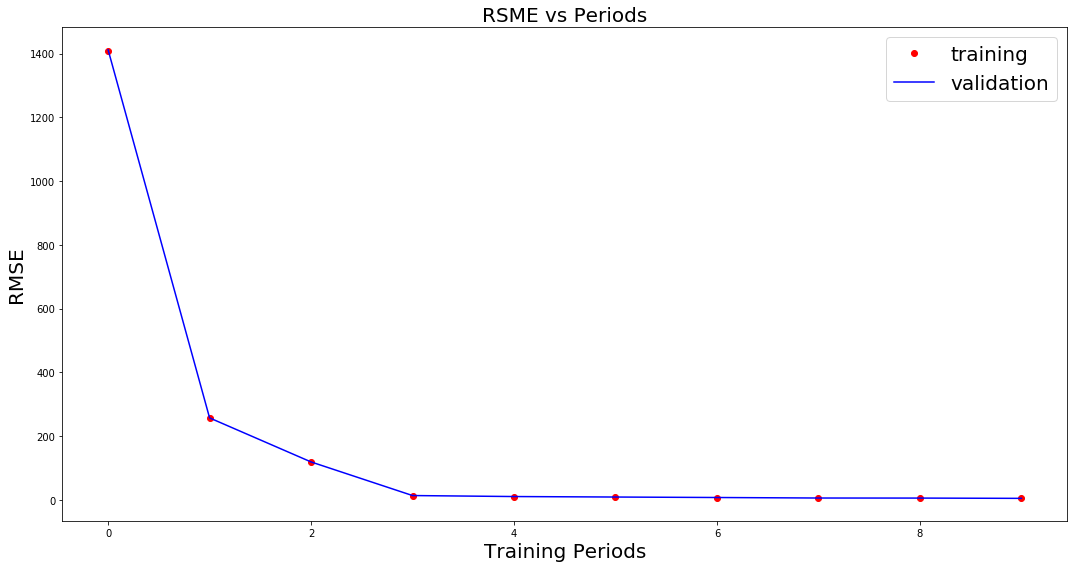

In [142]:
# Output a graph of loss metrics over periods.
plt.figure(figsize = (15,8))
plt.ylabel("RMSE", fontsize = 20)
plt.xlabel("Training Periods", fontsize = 20)
plt.title("RSME vs Periods", fontsize = 20)
plt.tight_layout()
plt.plot(adam_training_losses, 'ro', label="training")
plt.plot(adam_validation_losses, 'b-', label="validation")
plt.legend(fontsize = 20)
plt.savefig('RSME_traning_validate.png')
plt.show()

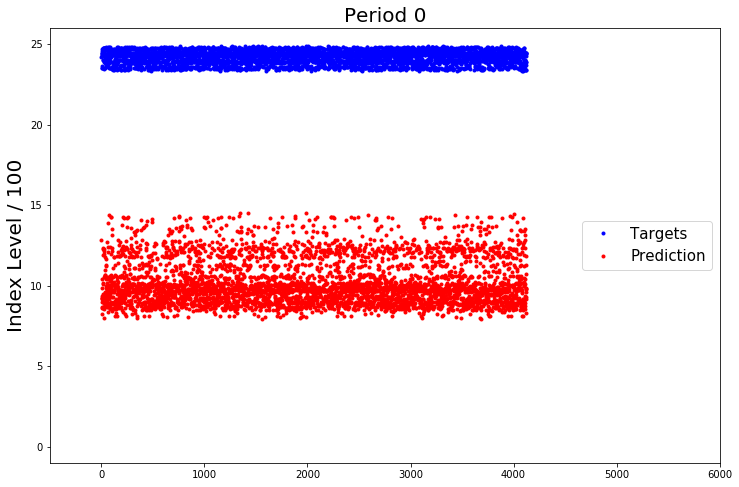

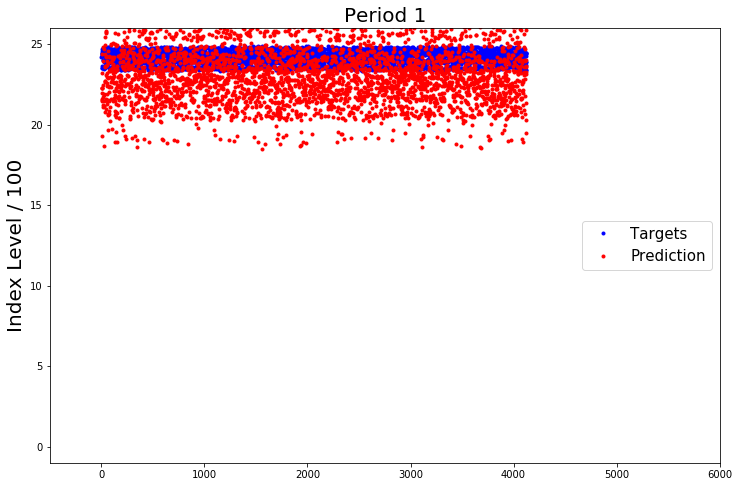

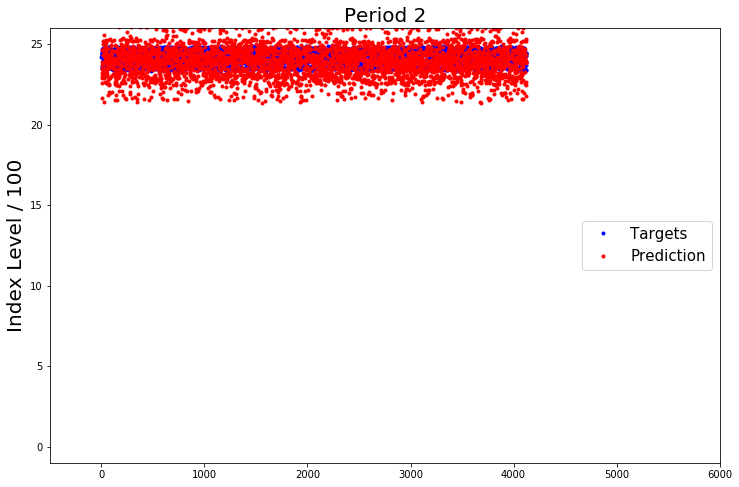

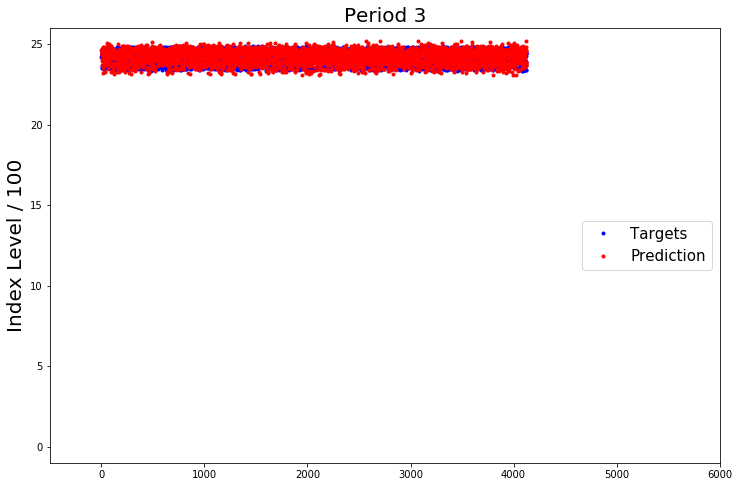

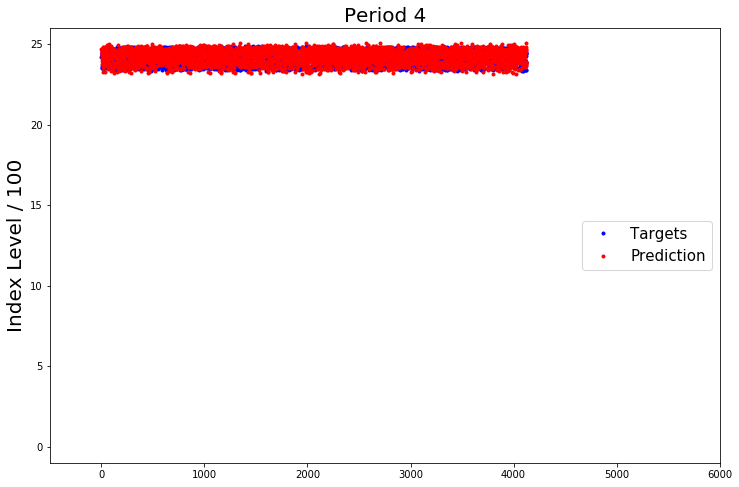

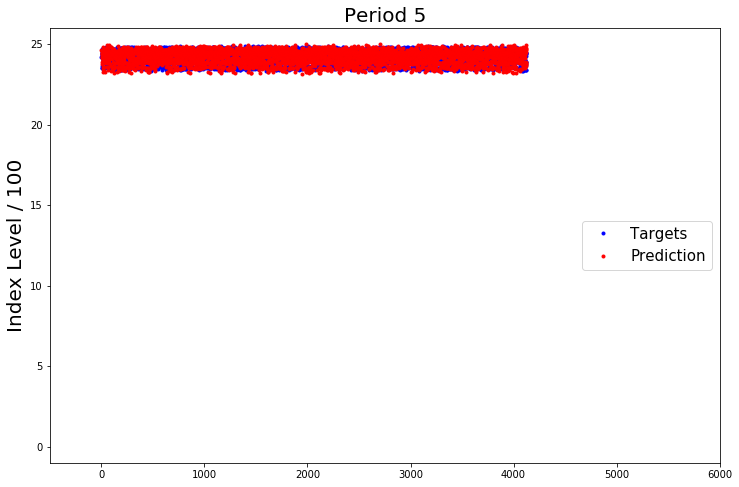

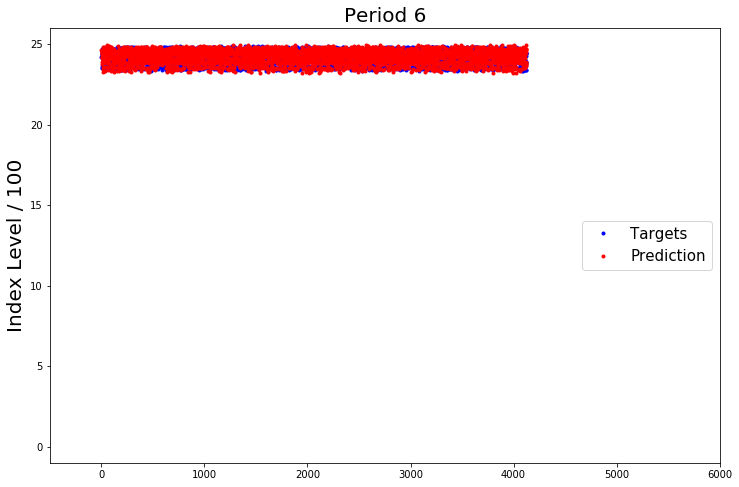

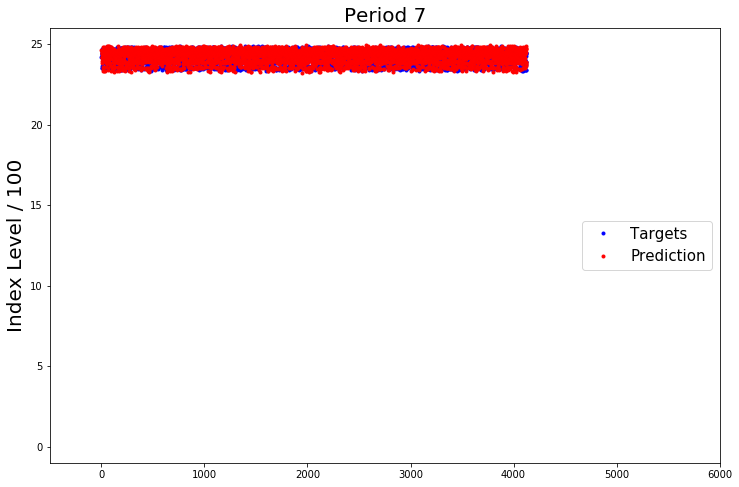

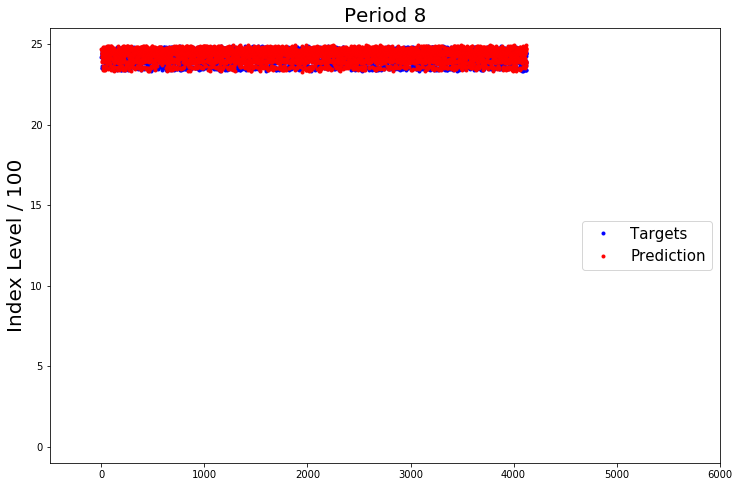

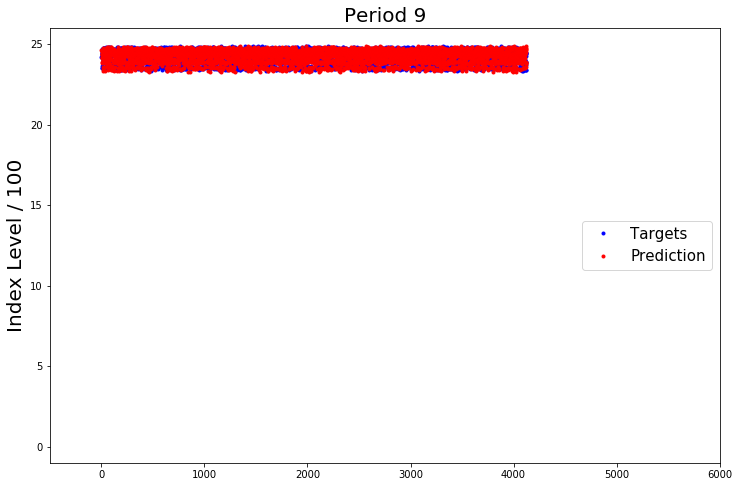

In [120]:
for i in range(len(validation_pred_set)):
    plt.figure(figsize = (12,8))
    plt.axis([-500, 6000, -1, 26])
    plt.plot(validation_targets.values, 'b.')
    plt.plot(validation_pred_set[i], 'r.')
    plt.legend(('Targets', 'Prediction'),loc = 'center right', fontsize = 15)
    plt.title('Period ' + str(i), fontsize = 20)
    plt.ylabel("Index Level / 100", fontsize = 20)
    plt.savefig('animation '+str(i)+'.png')
    plt.show()

#### Test DNN model

In [39]:
predict_test_input_fn = lambda: my_input_fn(test_examples, 
                                            test_targets, 
                                            num_epochs=1, 
                                            shuffle=False)

test_pred = dnn_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_pred])
    
# Compute test RMSE.
adam_test_losses = sqrt(metrics.mean_squared_error(test_predictions, test_targets))*100

# Model Metrics Summary

In [141]:
df_RMSE = pd.DataFrame()

df_RMSE.loc['RMSE_of_Training', 'Linear'] = RMSE_training_linear
df_RMSE.loc['RMSE_of_Validation', 'Linear'] = RMSE_validation_linear
df_RMSE.loc['RMSE_of_Test', 'Linear'] = RMSE_test_linear

df_RMSE.loc['RMSE_of_Training', 'Decision Tree'] = RMSE_training_decisionTree
df_RMSE.loc['RMSE_of_Validation', 'Decision Tree'] = RMSE_validation_decisionTree
df_RMSE.loc['RMSE_of_Test', 'Decision Tree'] = RMSE_test_decisionTree

df_RMSE.loc['RMSE_of_Training', 'Random Forest'] = RMSE_training_rf
df_RMSE.loc['RMSE_of_Validation', 'Random Forest'] = RMSE_validation_rf
df_RMSE.loc['RMSE_of_Test', 'Random Forest'] = RMSE_test_rf

df_RMSE.loc['RMSE_of_Training', 'SVR'] = RMSE_training_svr
df_RMSE.loc['RMSE_of_Validation', 'SVR'] = RMSE_validation_svr
df_RMSE.loc['RMSE_of_Test', 'SVR'] = RMSE_test_svr

df_RMSE.loc['RMSE_of_Training', 'DNN'] = adam_training_losses[-1]
df_RMSE.loc['RMSE_of_Validation', 'DNN'] = adam_validation_losses[-1]
df_RMSE.loc['RMSE_of_Test', 'DNN'] = adam_test_losses

df_RMSE.loc['RMSE_of_Training', '% of Mean(DNN)'] = \
100*adam_training_losses[-1]/np.mean(training_targets*100)
df_RMSE.loc['RMSE_of_Validation', '% of Mean(DNN)'] = \
100*adam_validation_losses[-1]/np.mean(validation_targets*100)
df_RMSE.loc['RMSE_of_Test', '% of Mean(DNN)'] = \
100*adam_test_losses/np.mean(test_targets*100)

with open('df_RMSE.tex','w') as tf:
    tf.write(df_RMSE.to_latex())
    
df_RMSE

,Linear,Decision Tree,Random Forest,SVR,DNN,% of Mean(DNN)
RMSE_of_Training,5.202164,5.110472,5.021089,4.519513,4.840889,0.199901
RMSE_of_Validation,5.057019,5.153003,5.056667,4.465245,4.890605,0.201991
RMSE_of_Test,5.180588,5.074917,4.951148,4.513872,4.771024,0.197066
